
You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [44]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

Holiday_Package 	 Opted for Holiday Package yes/no?
Salary 	 Employee salary
age 	 Age in years
edu 	 Years of formal education
no_young_children 	 The number of young children (younger than 7 years)
no_older_children 	 Number of older children
foreign 	 foreigner Yes/No

In [119]:
# reading the CSV file into pandas dataframe
df = pd.read_csv(r'C:\Users\Mathesh R\Downloads\Holiday_Package.csv') 

In [46]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [13]:
df.shape

(872, 8)

In [120]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [15]:
df.shape

(872, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [7]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [ ]:
a)Holiday_Package 	 Opted for Holiday Package yes/no

C:\Users\Mathesh R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

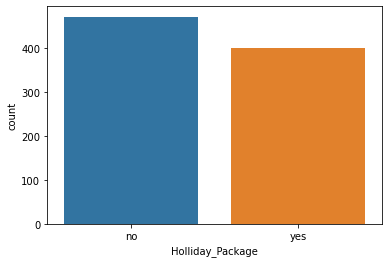

In [121]:
sns.countplot(df['Holliday_Package'])

In [12]:
print(df['Holliday_Package'].value_counts(normalize=True).sort_values())

yes    0.459862
no     0.540138
Name: Holliday_Package, dtype: float64


The variable 'Holiday package' is our target variable. 'Yes' denotes the employee opted for tour package. 'No' denotes that the employee didn't opt fot tour package. The data is well balanced.

b)Salary-Employee salary

In [14]:
print(df['Salary'].describe())

count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64


<AxesSubplot:xlabel='Salary', ylabel='Count'>

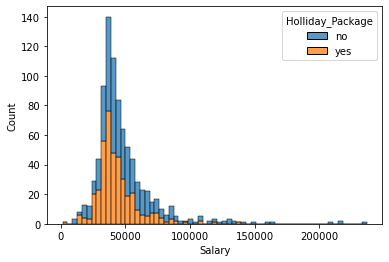

In [132]:
sns.histplot(data=df,x='Salary', hue='Holliday_Package',multiple="stack")

Employees with moderate income took the package compared to others.
Tour company can concentrate on employees with high income by offering luxury tour packages.

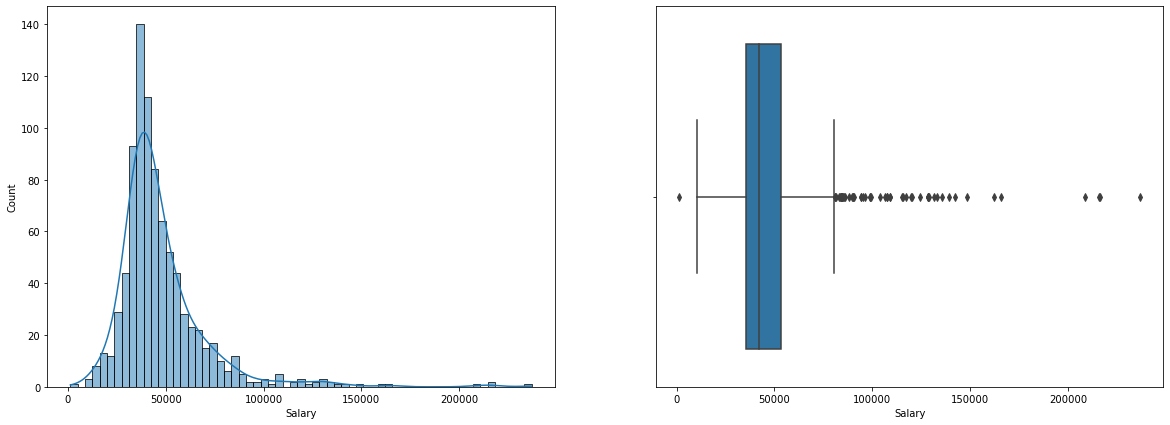

In [15]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='Salary', kde=True, ax=axes[0])
sns.boxplot(x='Salary', data=df, ax=axes[1])
plt.show()

a)The variable "salary" is normally distributed.
b)There are outliers are in the dataset.
c)Minimum salary is 1322.
d)Maximum salary is 236961.
e)The mean salary is greater than the median salary.

c)age-Age in years


In [133]:
print(df['age'].describe())

count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64


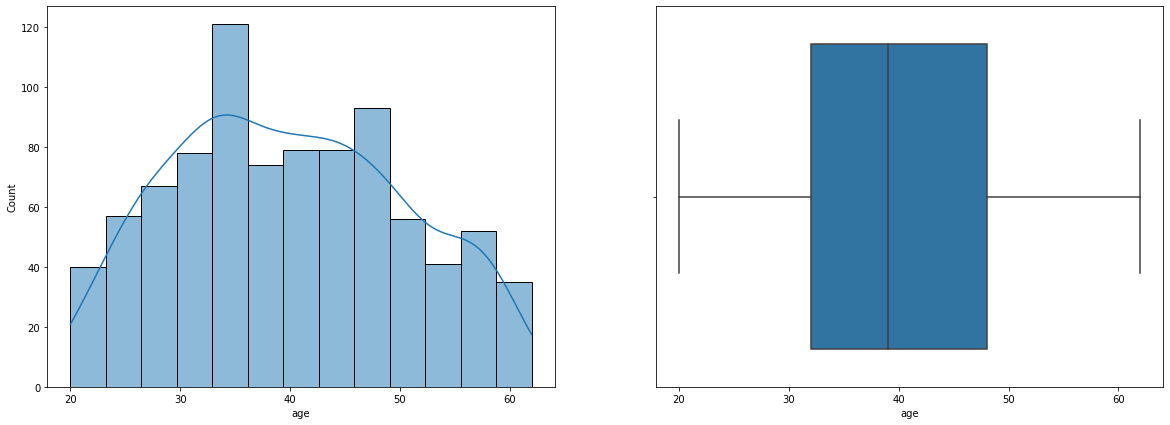

In [134]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='age', kde=True, ax=axes[0])
sns.boxplot(x='age', data=df, ax=axes[1])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '20'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '24'),
  Text(5, 0, '25'),
  Text(6, 0, '26'),
  Text(7, 0, '27'),
  Text(8, 0, '28'),
  Text(9, 0, '29'),
  Text(10, 0, '30'),
  Text(11, 0, '31'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '38'),
  Text(19, 0, '39'),
  Text(20, 0, '40'),
  Text(21, 0, '41'),
  Text(22, 0, '42'),
  Text(23, 0, '43'),
  Text(24, 0, '44'),
  Text(25, 0, '45'),
  Text(26, 0, '46'),
  Text(27, 0, '47'),
  Text(28, 0, '48'),
  Text(29, 0, '49'),
  Text(30, 0, '50'),
  Text(31, 0, '51'),
  Text(32, 0, '52'),
  Text(33, 0, '53'),
  Text(34, 0, '54'),
  Text(35, 0, '55'),
  Text(36, 0, '56'),
  Text(37, 0, '57'),
  Text(38, 0, 

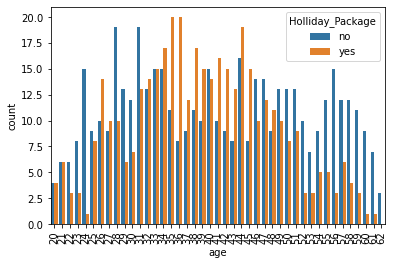

In [124]:
sns.countplot(data=df,x='age',hue='Holliday_Package')
plt.xticks(rotation=90)

In [ ]:
a)The variable "age" is normally distributed.
b)There are no outliers are in the dataset.
c)Minimum age is 20.
d)Maximum age is 62.
e)The mean and median age is almost same.

d)edu-Years of formal education


In [55]:
print(df['educ'].describe())

count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64


<AxesSubplot:xlabel='count', ylabel='educ'>

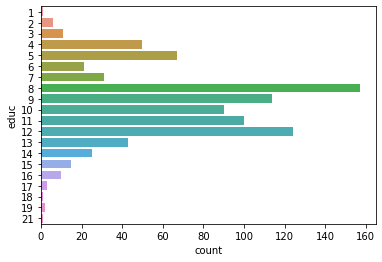

In [20]:
sns.countplot(data=df,y='educ')


<AxesSubplot:xlabel='educ', ylabel='Count'>

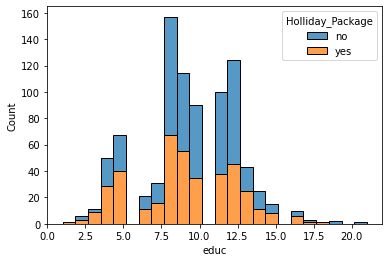

In [137]:
sns.histplot(data=df,x='educ', hue='Holliday_Package',multiple="stack")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '21')])

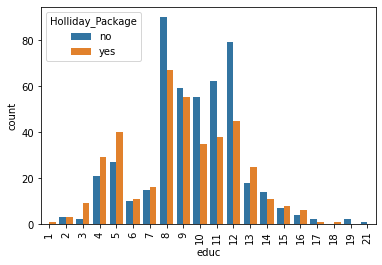

In [138]:
sns.countplot(data=df,x='educ',hue='Holliday_Package')
plt.xticks(rotation=90)

In [ ]:
Employees with formal education of 8 to 12 years have opted the packed less. So, the company can make plans to attract them

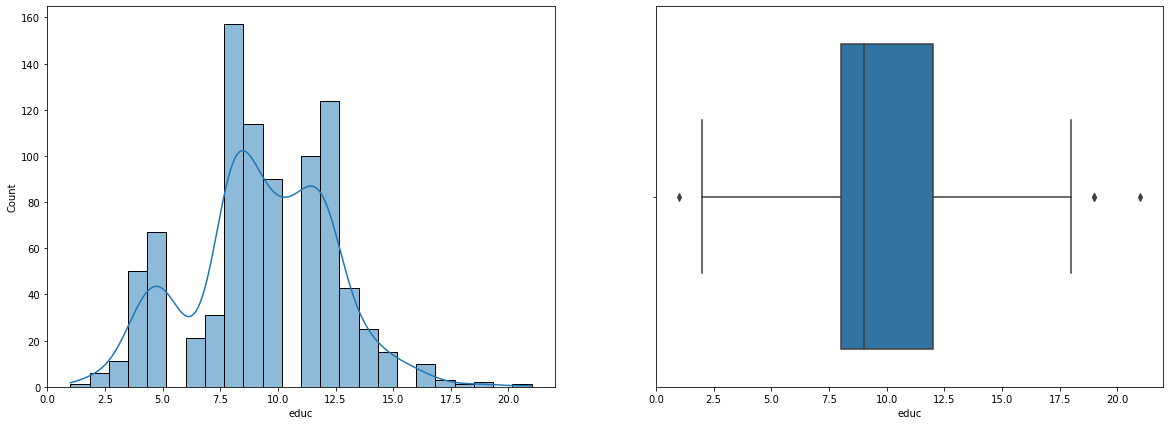

In [78]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='educ', kde=True, ax=axes[0])
sns.boxplot(x='educ', data=df, ax=axes[1])
plt.show()

a) The years of formal education is normally education and right skewed.
b) There are outliers in the dataset.
c) Minimum years of formal education is 1.
d) Maximum years of formal education is 21.
e) Mean and median years of formal education is almost equal.
f)

e)no_young_children 	 The number of young children (younger than 7 years)


<AxesSubplot:xlabel='no_young_children', ylabel='count'>

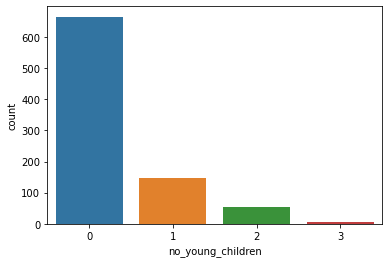

In [22]:
sns.countplot(data=df,x='no_young_children')

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

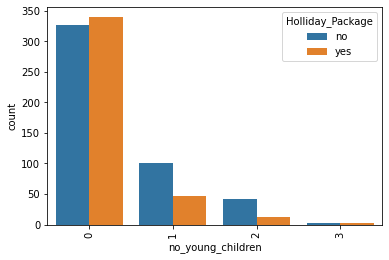

In [135]:
sns.countplot(data=df,x='no_young_children',hue='Holliday_Package')
plt.xticks(rotation=90)

In [ ]:
Employees with young children seems to shown lesser interest. So, they can prepare a child friendly package such as disney world.

<AxesSubplot:xlabel='no_young_children'>

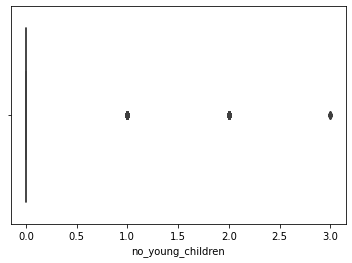

In [79]:
sns.boxplot(x='no_young_children', data=df)


In [25]:
print(df['no_young_children'].value_counts(normalize=True).sort_values())

3    0.005734
2    0.063073
1    0.168578
0    0.762615
Name: no_young_children, dtype: float64


no_older_children

<AxesSubplot:xlabel='no_older_children'>

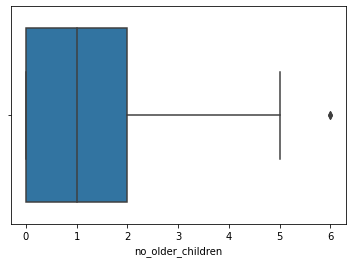

In [80]:
sns.boxplot(x='no_older_children', data=df)

no_older_children 	 Number of older children

<AxesSubplot:xlabel='no_older_children', ylabel='count'>

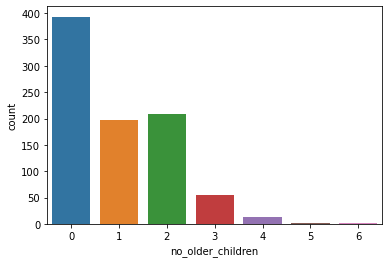

In [26]:
sns.countplot(data=df,x='no_older_children')

In [27]:
print(df['no_older_children'].value_counts(normalize=True).sort_values())

5    0.002294
6    0.002294
4    0.016055
3    0.063073
1    0.227064
2    0.238532
0    0.450688
Name: no_older_children, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

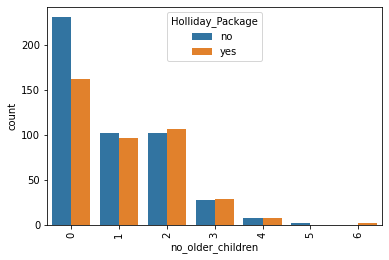

In [136]:
sns.countplot(data=df,x='no_older_children',hue='Holliday_Package')
plt.xticks(rotation=90)

In [ ]:
Employees with elder children seems to have taken the package, it means that the company offers more attactive package to tha category. So, the company can work more in what they are good at. 

foreign 	 foreigner Yes/No

<AxesSubplot:xlabel='foreign', ylabel='count'>

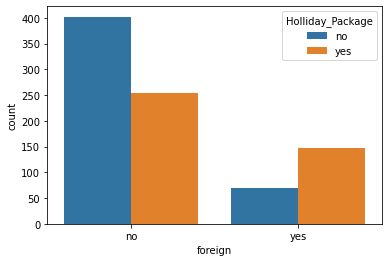

In [140]:
sns.countplot(data=df,x='foreign',hue='Holliday_Package')

In [ ]:
Foreigners account for most of the opted ones, so they may offer more revenues to the company.

In [29]:
print(df['foreign'].value_counts(normalize=True).sort_values())

yes    0.247706
no     0.752294
Name: foreign, dtype: float64


b)Bivariate

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

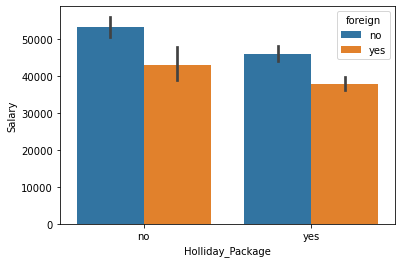

In [38]:
sns.barplot(data=df,x='Holliday_Package',y='Salary',hue='foreign')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

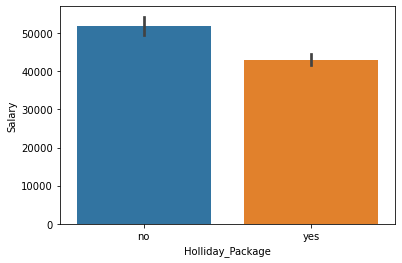

In [22]:
sns.barplot(data=df,x='Holliday_Package',y='Salary')

In [ ]:
sns.barplot(data=df,x='',y='Salary')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

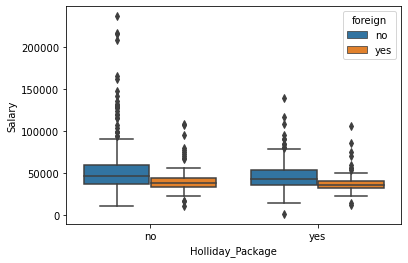

In [39]:
sns.boxplot(data=df,x='Holliday_Package',y='Salary',hue='foreign')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

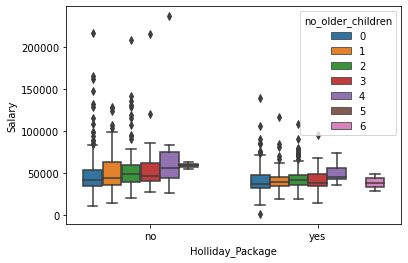

In [40]:
sns.boxplot(data=df,x='Holliday_Package',y='Salary',hue='no_older_children')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

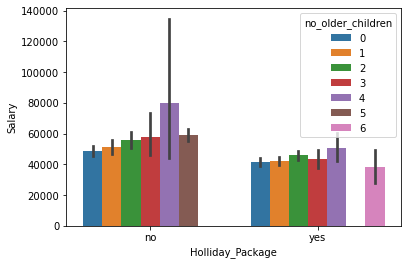

In [41]:
sns.barplot(data=df,x='Holliday_Package',y='Salary',hue='no_older_children')

In [ ]:
From the visualization, it is clear that the employees with  

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_older_children'>

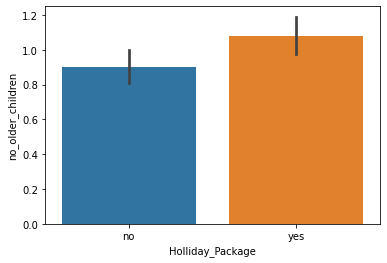

In [25]:
sns.barplot(data=df,x='Holliday_Package',y='no_older_children')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

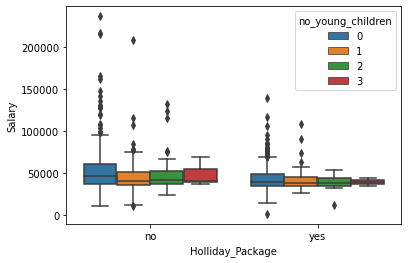

In [43]:
sns.boxplot(data=df,x='Holliday_Package',y='Salary',hue='no_young_children')

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

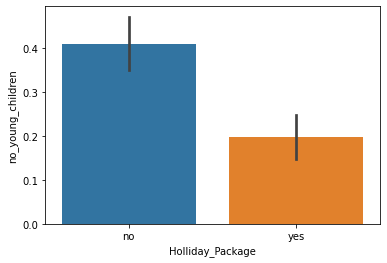

In [31]:
sns.barplot(data=df,x='Holliday_Package',y='no_young_children')

In [28]:
sns.countplot(data=df,y='Holliday_Package',x='no_young_children')

ValueError: Cannot pass values for both `x` and `y`

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

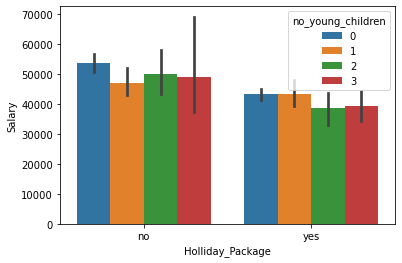

In [42]:
sns.barplot(data=df,x='Holliday_Package',y='Salary',hue='no_young_children')

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

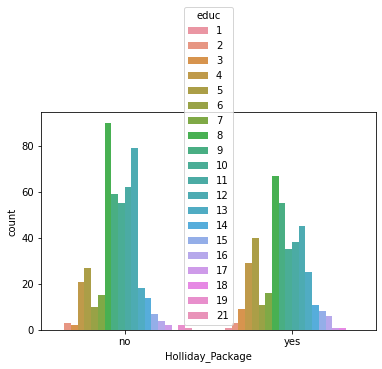

In [50]:
sns.countplot(data=df,x='Holliday_Package',hue='educ')

In [ ]:
sns.barplot(data=df,x='Holliday_Package',y='educ',hue='educ')

In [86]:
df.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.047029,0.352913,-0.034360,0.121993
age,0.047029,1.000000,-0.149682,-0.519093,-0.116205
educ,0.352913,-0.149682,1.000000,0.097342,-0.035904
no_young_children,-0.034360,-0.519093,0.097342,1.000000,-0.238428
no_older_children,0.121993,-0.116205,-0.035904,-0.238428,1.000000


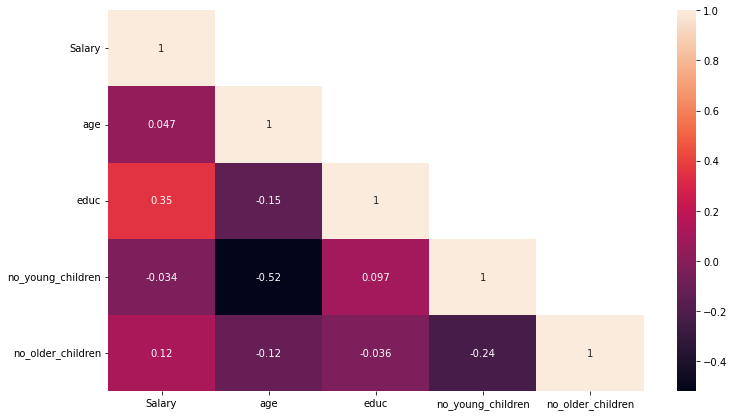

In [87]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

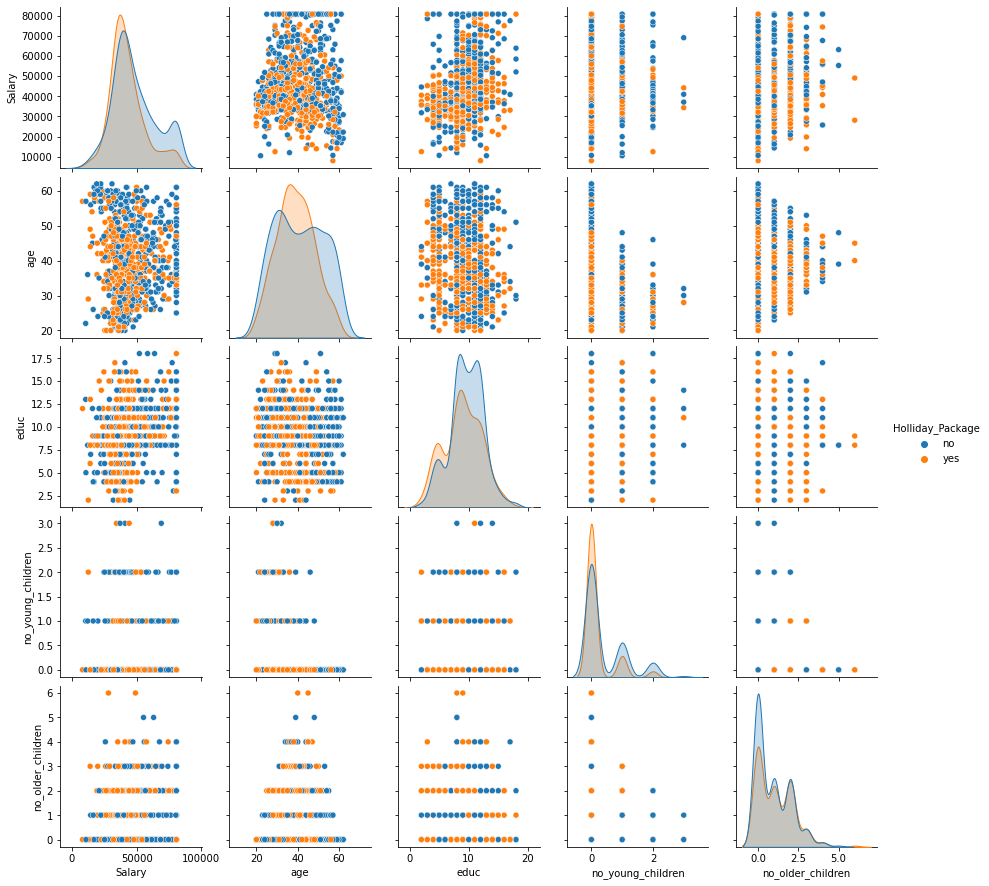

In [89]:
sns.pairplot(data=df,hue='Holliday_Package')

In [31]:
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [34]:
df.duplicated().sum()

0

Outliers

In [48]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

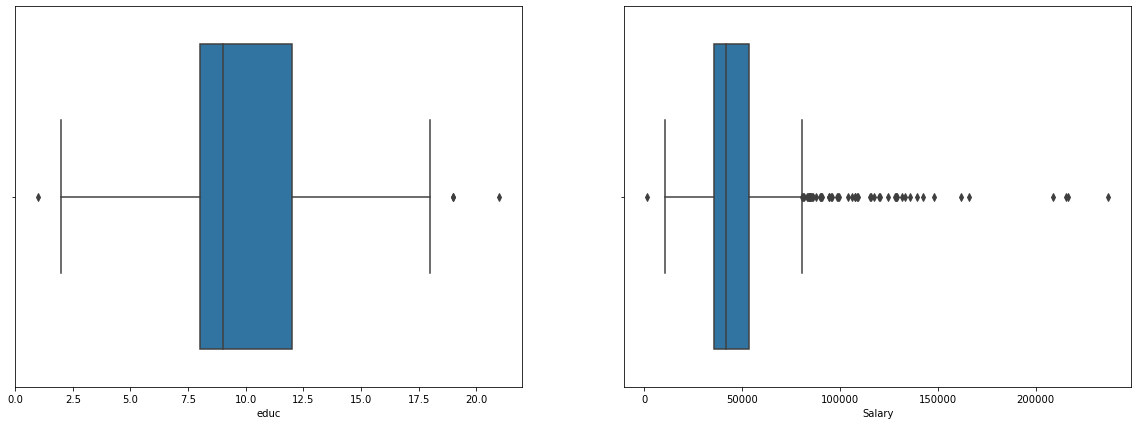

In [49]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.boxplot(x='educ', data=df, ax=axes[0])
sns.boxplot(x='Salary', data=df, ax=axes[1])
plt.show()

In [50]:
cols = ['Salary','educ']
for column in cols:
 #if df[column].dtype != 'object': 
         lr,ur=remove_outlier(df[column])
         df[column]=np.where(df[column]>ur,ur,df[column])
         df[column]=np.where(df[column]<lr,lr,df[column])

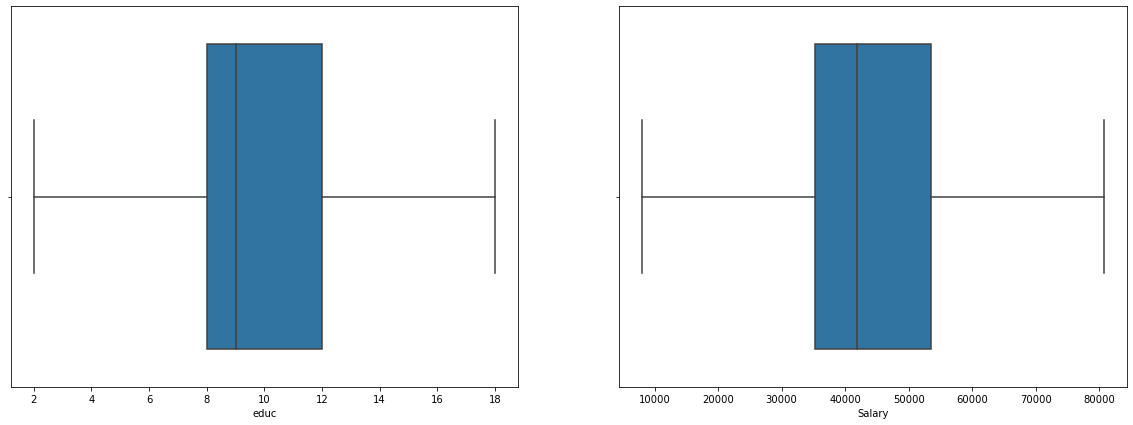

In [40]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.boxplot(x='educ', data=df, ax=axes[0])
sns.boxplot(x='Salary', data=df, ax=axes[1])
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [52]:
df['Holliday_Package']= LE.fit_transform(df['Holliday_Package'])
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8.0,1,1,no
1,1,37207.0,45,8.0,0,1,no
2,0,58022.0,46,9.0,0,0,no
3,0,66503.0,31,11.0,2,0,no
4,0,66734.0,44,12.0,0,2,no


In [68]:
df['foreign']= LE.fit_transform(df['foreign'])
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8.0,1,1,0
1,1,37207.0,45,8.0,0,1,0
2,0,58022.0,46,9.0,0,0,0
3,0,66503.0,31,11.0,2,0,0
4,0,66734.0,44,12.0,0,2,0


2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [ ]:
a)Logistic regression

In [69]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [70]:
X = df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df['Holliday_Package']

In [71]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8.0,1,1,0
1,37207.0,45,8.0,0,1,0
2,58022.0,46,9.0,0,0,0
3,66503.0,31,11.0,2,0,0
4,66734.0,44,12.0,0,2,0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['Holliday_Package'])

In [73]:
X_train.shape

(610, 6)

In [74]:
X_test.shape

(262, 6)

In [103]:
y_train.value_counts(1)


0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [104]:
y_test.value_counts(1)


0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [105]:
df.shape

(872, 7)

In [ ]:
# Fit the Logistic Regression model
#model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
#model.fit(X_train, y_train)

In [80]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg','liblinear'],
      'tol':[0.0001,0.00001]}

In [81]:
model = LogisticRegression(max_iter=10000,n_jobs=2)


In [77]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [78]:
grid_search.fit(X_train, y_train)


C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 464, in _check_solver
    raise Va

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [82]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


In [84]:
best_model = grid_search.best_estimator_


In [85]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [86]:
## Getting the probabilities on the train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()


,0,1
0,0.269981,0.730019
1,0.741976,0.258024
2,0.609886,0.390114
3,0.243792,0.756208
4,0.547373,0.452627


In [87]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.677949,0.322051
1,0.535355,0.464645
2,0.691996,0.308004
3,0.490056,0.509944
4,0.571840,0.428160


              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


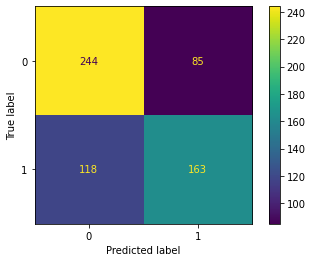

In [91]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');


              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


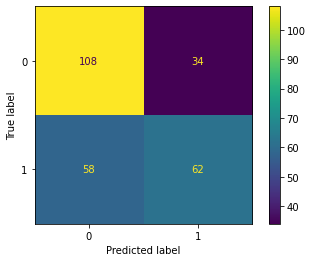

In [92]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC for the Training Data: 0.733
AUC for the Test Data: 0.715


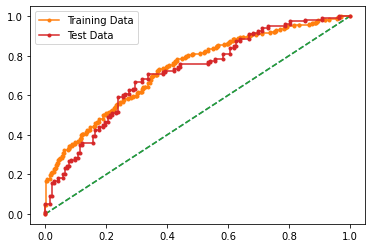

In [93]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,ytrain_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,ytest_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

LDA Model

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [109]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [110]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

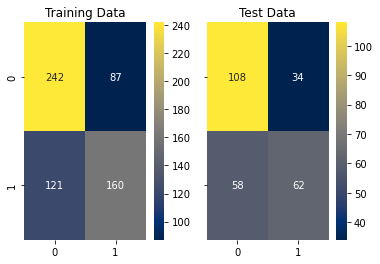

In [112]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='cividis',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [113]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



In [114]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [126]:
pred_prob_train[:,1]

array([0.73551768, 0.28353533, 0.39649058, 0.75922189, 0.47003003,
       0.40177036, 0.36986276, 0.3046299 , 0.60482453, 0.64266073,
       0.23173951, 0.25792362, 0.35900888, 0.04498625, 0.2829094 ,
       0.3643531 , 0.54782489, 0.30634075, 0.58914069, 0.6607117 ,
       0.62795172, 0.26530773, 0.88138953, 0.33411259, 0.08664023,
       0.8271775 , 0.19379564, 0.75733957, 0.53209164, 0.1892203 ,
       0.29258073, 0.3384893 , 0.3769479 , 0.38097484, 0.31056554,
       0.29449197, 0.10973564, 0.56147758, 0.48217964, 0.19474058,
       0.22634057, 0.7985467 , 0.50039742, 0.73794034, 0.7904354 ,
       0.3690023 , 0.30262021, 0.93345931, 0.43331819, 0.72155301,
       0.71677925, 0.45274194, 0.78744639, 0.37233837, 0.19187097,
       0.74091501, 0.25003165, 0.51612541, 0.67432724, 0.35616917,
       0.61002822, 0.52758233, 0.52261599, 0.40993742, 0.57008809,
       0.61654303, 0.12380369, 0.56372873, 0.40105364, 0.27636387,
       0.331064  , 0.74844526, 0.77913611, 0.21862757, 0.44518

AUC for the Training Data: 0.731
AUC for the Test Data: 0.713


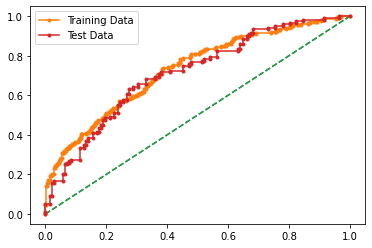

In [115]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()